In [29]:
"""
Created on Fri Dec 27 14:47 2019

@author: Soeren Brandt
"""

# import our modules
import fra_expt

# import some generally useful modules
import numpy as np
import matplotlib.pyplot as plt
import scipy
from collections import OrderedDict

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']

In [2]:
exp_num = 199

# import os  #os.listdir('../../../../Shared drives/FRA DOT paper/Figures/Figure 1')
homedir = '../../../../Shared drives/FRA DOT paper/Figures/Figure 1/'

labelsize = 13
ticksize = 12
legendsize = 12

### Functions

In [3]:
def plot_river(exp, addPeak = True, ax = None):
    if ax == None:
        fig, ax = plt.subplots()

    # Load figure data
    exp = exp.main_spec_data.set_times(600).lower_data_freq(1)
    extent = [np.min(exp.wavelengths), np.max(exp.wavelengths), np.max(exp.times), np.min(exp.times)]

    times = [0, 100, 150, 200, 250, 300, 400, 500, 599]
    vmin = np.amin(exp.spectra)
    vmax = np.amax(exp.spectra)
    im = ax.imshow(exp.spectra, vmin=vmin, vmax=vmax, interpolation='none', extent=extent, cmap='jet')

    ## Define image labels
    ax.set_ylabel('Time (s)', fontsize=labelsize)
    ax.set_xlabel('Wavelength (nm)', fontsize=labelsize)
    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.tick_params(axis='x',colors='black')
    ax.tick_params(axis='y',colors='black')
    ax.set_xlim([400, 800])

    # Image aspect ratio
    xext, yext = ax.get_xlim(), ax.get_ylim()
    xrange = xext[1] - xext[0]
    yrange = yext[1] - yext[0]
    ax.set_aspect(1 * abs(xrange / yrange)) # This is the line that causes the warnings about unicode
    #ax2.axis('off');
    ax.set_yticks(times);
    ax.set_yticklabels(times[:-1]+[600], {'fontsize': ticksize});
    #ax.set_xticks([]);
    ax.set_xticklabels([]);
    
    # Add peak location
    ft_data = np.fft.fft(exp.spectra)
    exp_deriv = scipy.signal.savgol_filter(np.imag(ft_data[:, 1])/(np.real(ft_data[:, 1])**2 + np.imag(ft_data[:, 1])**2) ** 0.5,window_length=31, polyorder=2)
    peak_loc = (exp_deriv-np.min(exp_deriv))/(np.max(exp_deriv)-np.min(exp_deriv)) * (exp.wavelengths[np.argmax(exp.spectra[-1,:])]-exp.wavelengths[np.argmax(exp.spectra[0,:])]) + exp.wavelengths[np.argmax(exp.spectra[0,:])]

    ax.plot(peak_loc,np.linspace(0,599,len(exp_deriv)),'w--')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax = ax)
    cbar.ax.tick_params(labelsize=ticksize)


def plot_spectra(exp, ax = None):
    if ax == None:
        fig, ax = plt.subplots()
        
    # Load figure data
    exp = exp.main_spec_data.set_times(600).lower_data_freq(1)
    maxI = np.max(exp.spectra)
    maxW = np.max(exp.wavelengths)
    minW = np.min(exp.wavelengths)

    # Plot spectra
    times = [0, 100, 150, 200, 250, 300, 400, 500, 599]
    colors = np.concatenate([np.ones([3,len(times)])*times/1.3/600, np.ones([1,len(times)])], axis = 0)
    for t, col in zip(times, colors.T):
        ax.plot(exp.wavelengths, exp.spectra[t,:]/maxI, c= col)
    
    ax.set_xlabel("Wavelength (nm)", fontsize=labelsize)
    ax.set_ylabel("Intensity (a.u.)", fontsize=labelsize)
    ax.tick_params(labelsize = ticksize)
    ax.set_xlim([400, 800])
    ax.set_ylim([0, 1.1])


from plot_functions import plot_phase
#plot_phase(exp_num, labels = None, norm = False, ax = None, color = None);
    
import matplotlib.image as img

def plot_im(filename, ax = None):
    if ax == None:
        fig, ax = plt.subplots()
        
    im = img.imread(homedir + filename)
    ax.imshow(im)
    ax.axis('off')

# Create figure

In [8]:
exp = fra_expt.get_expt(199)

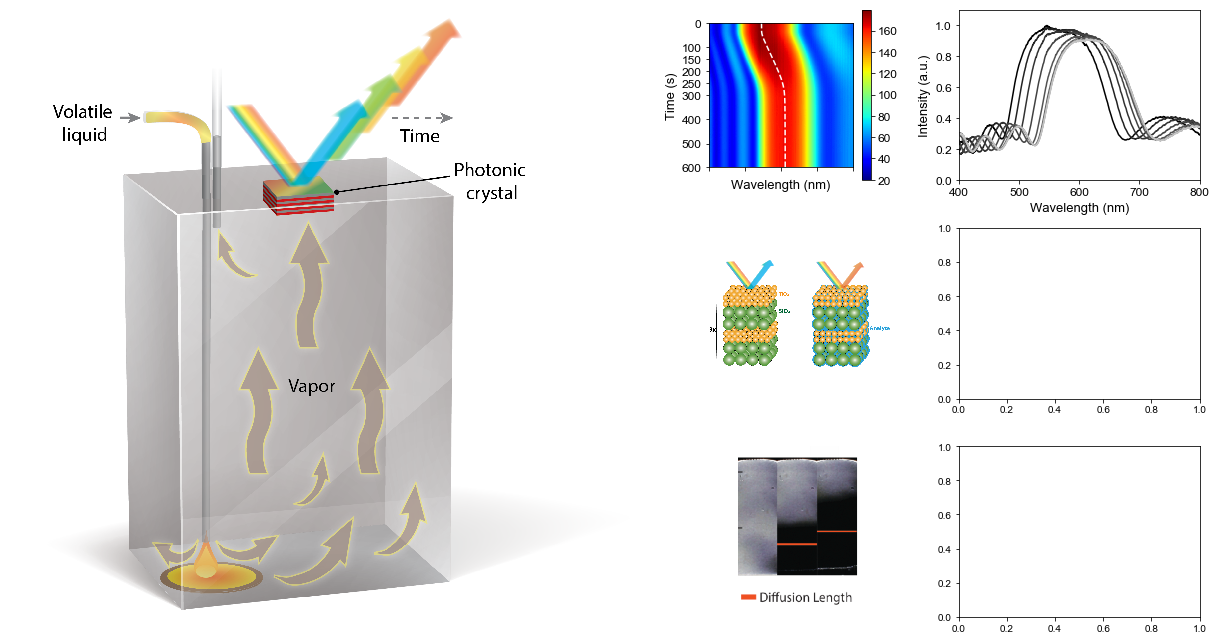

In [42]:
from matplotlib import gridspec
widths = [10, 3, 4]
heights = [3, 3, 3]
fig = plt.figure(figsize=(sum(widths),sum(heights))) 
gs = gridspec.GridSpec(ncols=len(widths), nrows=len(heights), width_ratios=widths,
                          height_ratios=heights)

# divide figure into suplots
axA = fig.add_subplot(gs[0:3, 0])
axB = [fig.add_subplot(gs[c, 1]) for c in range(0,3)]
axC = [fig.add_subplot(gs[c, 2]) for c in range(0,3)]
#axD = [fig.add_subplot(gs[c, -1]) for c in range(0,3)]

# Plot Chamber figure
plot_im('Chamber.png', ax = axA)
#ax.set_adjustable('box')

# Plot images next to Chamber figure
plot_im('sensor.png', ax = axB[1])
plot_im('Schlieren.png', ax = axB[-1])
# add river plot
plot_river(exp, addPeak = True, ax = axB[0])

# Add processing images
plot_spectra(exp, ax = axC[0])

plt.tight_layout()
    
## remove legends from all plots
#for a in axA+axB+axC:
#    if a.get_legend() != None:
#        a.get_legend().remove()
#
## add legends to the first column
#axA[0].legend(loc="lower center", fontsize = legendsize, markerscale = 1.5, handlelength=0.5);
#axB[0].legend(loc="lower center", fontsize = legendsize, markerscale = 1.5, handlelength=0.5);
#
## change x-lim in last row
#maxLim = [0,0]
#for a in axC:
#    if a.get_ylim()[0] < maxLim[0]:
#        maxLim[0] = a.get_ylim()[0]
#    if a.get_ylim()[1] > maxLim [1]:
#        maxLim[1] = a.get_ylim()[1]
#for a in axC:
#    a.set_ylim(maxLim)
#    a.set_xlim([0,600])
##fig.savefig('../../../../../Macintosh HD/Users/Soren/Desktop/Figure-3 JN.svg', format='svg', dpi=1200)

# Define experiment to plot

In [11]:
from datasets import original_SVC_set, pure_compounds_in_tall_cuvettes, train_test_split
exp_set = pure_compounds_in_tall_cuvettes()
exp_set

OrderedDict([('Pentane', [148, 174, 202, 203, 239, 240, 241, 434, 435]),
             ('Hexane', [175, 184, 185, 186, 187, 199, 204, 205, 424, 425]),
             ('Heptane', [150, 206, 207]),
             ('Octane', [151, 177, 208, 209, 242, 243, 244, 283]),
             ('Nonane', [152, 178, 188, 189, 267]),
             ('Decane', [153, 179, 190, 191, 197, 268, 284]),
             ('Ethanol', [157, 171, 324, 330, 440, 441, 442]),
             ('Water', [169, 170, 312, 313, 443, 444, 445]),
             ('Acetone', [159, 160, 326, 327, 436, 437, 438, 439]),
             ('Toluene', [154, 181, 446, 447, 448, 449, 450]),
             ('Acetonitrile', [163, 164, 452, 453, 454])])

Choose number

In [27]:
exp_num = [202]#[148, 199]

#### Make river plot

In [5]:
exp.wavelengths[np.argmax(exp.spectra[0,:])]

NameError: name 'exp' is not defined

In [22]:
exp.wavelengths[np.argmax(exp.spectra[-1,:])]

612.38

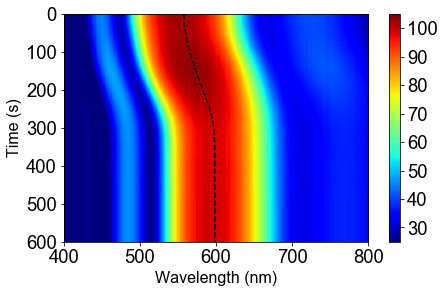

In [28]:
from plot_functions import plot_river
from data_functions import load_set_from_CSV 

axes = []
try:
    for num in exp_num:
        # load data
        exp = fra_expt.get_expt(num).main_spec_data.set_times(600).lower_data_freq(1)
        ft_data = np.fft.fft(exp.spectra)
        exp_deriv = scipy.signal.savgol_filter(np.imag(ft_data[:, 1])/(np.real(ft_data[:, 1])**2 + np.imag(ft_data[:, 1])**2) ** 0.5,window_length=31, polyorder=2)
        peak_loc = (exp_deriv-np.min(exp_deriv))/(np.max(exp_deriv)-np.min(exp_deriv)) * (exp.wavelengths[np.argmax(exp.spectra[-1,:])]-exp.wavelengths[np.argmax(exp.spectra[0,:])]) + exp.wavelengths[np.argmax(exp.spectra[0,:])]
        
        plot_river(exp)
        plt.plot(peak_loc,np.linspace(0,599,len(exp_deriv)),'k--')
        plt.clim(25, 105)
        cbar = plt.colorbar()
        cbar.ax.tick_params(labelsize=18.5)
        plt.tick_params(labelsize=18.5)
        
        plt.xlim([400, 800])
        plt.gca().set_aspect(4/8.)
        
        axes.append(plt.gcf())
except:
    exp = fra_expt.get_expt(exp_num).main_spec_data.set_times(600).lower_data_freq(1)
    exp_derivs, _, _ = load_set_from_CSV({'experiments':[exp_num]})
        
    plot_river(exp)
    plt.colorbar()
    axes.append(plt.gcf())
#plt.savefig('../../../../../Macintosh HD/Users/Soren/Desktop/River' + str(exp_num) + '.eps', dpi=300, bbox_inches='tight')

Save figure

In [72]:
if raw_input().lower() in ['','y','yes']:
    try:
        for n,num in enumerate(exp_num):
            axes[n].savefig('../../../../../Macintosh HD/Users/Soren/Desktop/Figure 1 - Riverplot' + str(num) + '.eps', dpi=300, bbox_inches='tight')
            plt.close()
    except:
        axes[0].savefig('../../../../../Macintosh HD/Users/Soren/Desktop/Figure 1 - Riverplot' + str(exp_num) + '.eps', dpi=300, bbox_inches='tight')
    print('saved')
else:
    print('not saved')

y
saved


In [77]:
exp_num = 199

In [78]:
exp = fra_expt.get_expt(exp_num)

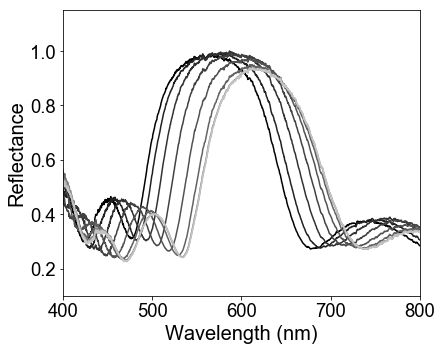

In [176]:
plot_spectra(exp)
plt.gca().tick_params(labelsize = 18.5)
plt.xlabel('Wavelength (nm)', fontsize=20)
plt.ylabel('Reflectance', fontsize=20)
plt.ylim([0.1, 1.15])
plt.gca().set_aspect(np.diff(plt.xlim())/np.diff(plt.ylim())*4/5.)
plt.gcf().set_size_inches(8*4./5.,8)
plt.savefig('../../../../../Macintosh HD/Users/Soren/Desktop/Figure 1 - Spectra' + str(exp_num) + '.eps', dpi=300, bbox_inches='tight')

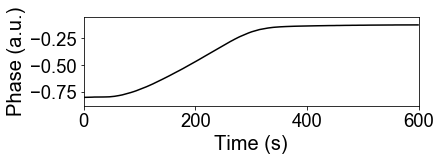

In [177]:
plot_phase(199, labels = None, norm = False, ax = ax, color = None)
plt.gca().get_children()[0].set_color('k')
plt.gca().tick_params(labelsize = 18.5)
plt.ylim([-0.88,-0.05])
plt.gca().set_xticks(np.arange(0, 601, step=200))
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Phase (a.u.)', fontsize=20)
plt.gca().set_aspect(np.diff(plt.xlim())/np.diff(plt.ylim())*4/15.)
plt.savefig('../../../../../Macintosh HD/Users/Soren/Desktop/Figure 1 - Phase' + str(exp_num) + '.eps', dpi=300, bbox_inches='tight')